# Misophonia dataset analysis

### Import libraries:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import statistics
from scipy import stats
from scipy.stats import chi2_contingency

# Misophonia datafile 

In [2]:
# Reading an Excel SpreadSheet and storing it in as a DataFrame called `df`
df0 = pd.read_excel('https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/blob/main/datasets/misophoinia_data.xlsx?raw=true')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Misofonia              123 non-null    object 
 1   Misofonia.dic          123 non-null    float64
 2   Estado                 123 non-null    object 
 3   Estado.dic             123 non-null    float64
 4   ansiedad.rasgo         123 non-null    float64
 5   ansiedad.rasgo.dic     123 non-null    float64
 6   ansiedad.estado        123 non-null    float64
 7   ansiedad.estado.dic    123 non-null    float64
 8   ansiedad.medicada      123 non-null    object 
 9   ansiedad.medicada.dic  123 non-null    float64
 10  depresion              123 non-null    float64
 11  depresion.dic          123 non-null    float64
 12  Sexo                   123 non-null    object 
 13  Edad                   123 non-null    float64
 14  CLASE                  123 non-null    object 
 15  Angulo

We can see that a lot of parameters including "Misofonia" are not defined for 15 people. Let's study these rows.

In [3]:
if_nan_bool = df0['Misofonia'].notnull() # finding rows with NaN values for misophonia
df_nan = df0[~if_nan_bool] # storing these rows in df_nan
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 123 to 137
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Misofonia              0 non-null      object 
 1   Misofonia.dic          0 non-null      float64
 2   Estado                 0 non-null      object 
 3   Estado.dic             0 non-null      float64
 4   ansiedad.rasgo         0 non-null      float64
 5   ansiedad.rasgo.dic     0 non-null      float64
 6   ansiedad.estado        0 non-null      float64
 7   ansiedad.estado.dic    0 non-null      float64
 8   ansiedad.medicada      0 non-null      object 
 9   ansiedad.medicada.dic  0 non-null      float64
 10  depresion              0 non-null      float64
 11  depresion.dic          0 non-null      float64
 12  Sexo                   0 non-null      object 
 13  Edad                   0 non-null      float64
 14  CLASE                  0 non-null      object 
 15  Angul

These 15 rows contain all NaN values for all the columns except "Misofonia.post" and "Misofonia.pre". For now we don't want to study the change of misofonia score before and after an educational program, so we will just drop these rows. Below you can see tha dataset we are going to work with.

In [4]:
df = df0[if_nan_bool]
df

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,...,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,...,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,...,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,...,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,...,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,...,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,si,3.0,casado,1.0,89.0,1.0,80.0,1.0,no,0.0,...,50.0,III,7.70,21.3,85.2,-5.2,2.0,17.0,15.0,-9.0
119,si,4.0,casado,1.0,96.0,1.0,97.0,1.0,si,1.0,...,31.0,III,6.02,5.0,80.2,2.5,0.0,21.0,17.0,1.0
120,si,2.0,casado,1.0,89.0,1.0,80.0,1.0,no,0.0,...,52.0,III,2.50,12.9,74.9,2.9,1.0,NaN,NaN,-9.0
121,si,3.0,soltero,0.0,95.0,1.0,85.0,1.0,si,1.0,...,48.0,II,19.00,5.9,107.6,8.1,2.0,17.0,17.0,-10.0


# Demografics:

In [5]:
from collections import Counter
count_sex = Counter(df['Sexo'])
H = count_sex['H']
M = count_sex['M']
Tot = H + M
aa = df['Edad'].mean()
ad = df['Edad'].std()
print(f'In total {Tot} people from {df["Edad"].min()} to {df["Edad"].max()} years old took part in the reseach, amongst them {H} man and {M} women.')
print(f'The average age is {round(aa, 1)} with standart deviation {round(ad, 1)}.')

In total 123 people from 13.0 to 86.0 years old took part in the reseach, amongst them 45 man and 78 women.
The average age is 43.9 with standart deviation 14.2.


Here you can see age distribution of the participants grouped by sex as well as their marital status.


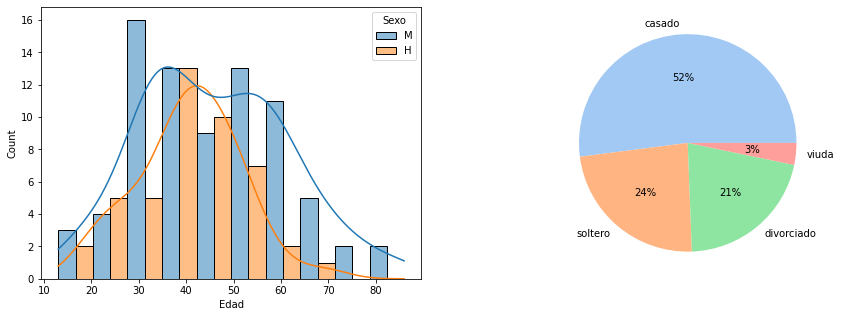

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(data=df, x='Edad', hue='Sexo', kde=True, multiple = 'dodge', ax=axes[0])
maritaldf=df['Estado'].value_counts()
plt.pie(maritaldf,labels=maritaldf.index, colors = sns.color_palette('pastel'),autopct='%.0f%%')
#data, labels = labels, colors = colors, autopct='%.0f%%'
print("Here you can see age distribution of the participants grouped by sex as well as their marital status.")

# MAD study: Misophonia, Anxiety, Depression
In this section we are going to study relationship between misophonia, anxiety and depression. 

We start with visualising our data. 

First subplot is a scatter plot for deppresion and anxiety with hue coressponding to 0-4 misophonia score. One can see that dark points corresponding to the high misophonia score are concentrated in the right part of the plot where anxiety score is also high. However, there are no such relevant features in up-down distribution where the depression score changes. Also one can see that the upper left angle of the plot is almost empty, so there were very few people simultaneously having high score of depression and low anxiety score. 

Following two subplots are boxplots for the distrubution of anxiety and depression for people who have misophonia and for people who don't. We can see that the anxiety distributes differently for people with and without misiphonia, while for depression the distributions are more similar.


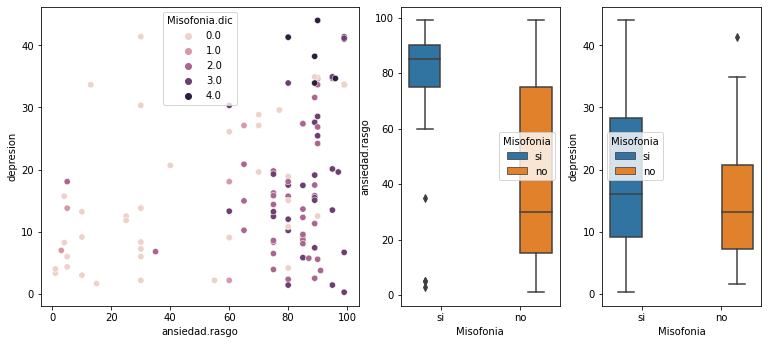

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 5.5), gridspec_kw={'width_ratios': [6, 3, 3]} )
plt.subplots_adjust(left=1, right=2)
sns.scatterplot(data=df, x='ansiedad.rasgo', y='depresion', hue='Misofonia.dic', s = 40, ax = axes[0])
sns.boxplot(data=df, x = 'Misofonia', y='ansiedad.rasgo', hue = 'Misofonia', ax = axes[1])
sns.boxplot(data=df, x = 'Misofonia', y='depresion', hue = 'Misofonia', ax = axes[2]);

Now let's see if the means of the distributions differ significantly for people with misophonia and without it. Our null hypothesys will be that the mean stays the same, alternative  - it's different. 

In [8]:
print('Number of peopple with misophonia: ', len(df[df['Misofonia'] == 'si']))
print('Number of peopple without misophonia: ', len(df[df['Misofonia'] == 'no']))

Number of peopple with misophonia:  82
Number of peopple without misophonia:  41


As our samples are large enough (>30) we can apply CLT and consider that their means distribute normally. It means that t-test can be used to see how significant are the differences between means. 

In [9]:
Si_A = df[df['Misofonia'] == 'si']['ansiedad.rasgo']
No_A = df[df['Misofonia'] == 'no']['ansiedad.rasgo']
print('Anxiety: ', stats.ttest_ind(Si_A, No_A, equal_var = False))

Si_D = df[df['Misofonia'] == 'si']['depresion']
No_D = df[df['Misofonia'] == 'no']['depresion']
print('Depression: ', stats.ttest_ind(Si_D, No_D, equal_var = False))

Anxiety:  Ttest_indResult(statistic=6.845935758040755, pvalue=6.617894920500896e-09)
Depression:  Ttest_indResult(statistic=1.569434381133438, pvalue=0.12016276920643687)


We see that p-value for anxiety is very small, which means that our null hypothesis is wrong and anxiety mean score is significantly higher for people who have misophonia than for those who don't. 

On the other hand, p-value for depression is 0.12, which means that 12% of observations are rarer than ours, and our observation falls into 95% of most common. We stay with the null hypotesys - mean depression score doesn't differ significantly for people with and without misophonia.

At last let's have a look at the correlation between anxiety and depression. As we don't assume that our data is normally distributed, we use Spearman correlation.

In [10]:
print(stats.spearmanr(df['ansiedad.rasgo'],df['depresion']))

SpearmanrResult(correlation=0.3734434717301706, pvalue=2.0964344657511374e-05)


Quite low p-value suggests that the null hypothesys that this parameters don't correlate is false and there is some positive correlation between them. 

Thus, we see that presence of misophonia is linked to the **score** of anxiety but doesn't seem to be linked to the **score** of depression. Now we also want to see if **presence** of misophonia is linked to the **presence** of anxiety/depression. 

To do that we decided to create contingency tables for both parameters contrasted with misofonia presence or absence.

We then performed both Chi-Squared and Fischer's exact tests to determine if there was any significant variance in between the proportion for both analysis. 

In [40]:
#Anxiety and Misofonia contingency table
from scipy.stats import fisher_exact
from tabulate import tabulate
aSi_1 = len(df[(df['Misofonia'] == 'si') & (df['ansiedad.rasgo.dic'] == 1.0)])
aSi_0 = len(df[(df['Misofonia'] == 'si') & (df['ansiedad.rasgo.dic'] == 0.0)])
aNo_1 = len(df[(df['Misofonia'] == 'no') & (df['ansiedad.rasgo.dic'] == 1.0)])
aNo_0 = len(df[(df['Misofonia'] == 'no') & (df['ansiedad.rasgo.dic'] == 0.0)])
#print(Si_1, Si_0, No_1, No_0)
da = pd.DataFrame({'Misophonia yes': [aSi_0, aSi_1], 'Misophonia no': [aNo_0, aNo_1]})
#Chi square test to test varience between groups
c, p, dof, expected = chi2_contingency(da)
#Fischer's exact test
cont_misA = da[['Misophonia yes','Misophonia no']]
oddsr, p_misA = fisher_exact(cont_misA, alternative='two-sided')
#Results
print('Anxiety: 0 - no, 1 - yes')
print(f'-The resulting chi squared score, p value respectively, and dof are: {c,p,dof}')
print(f"-While the Fischer's exact test p value is {p_misA}")
print(tabulate(da, headers = 'keys', tablefmt = 'fancy_grid'))

Anxiety: 0 - no, 1 - yes
-The resulting chi squared score, p value respectively, and dof are: (39.088293650793645, 4.0506552667169314e-10, 1)
-While the Fischer's exact test p value is 1.8657599840700804e-10
╒════╤══════════════════╤═════════════════╕
│    │   Misophonia yes │   Misophonia no │
╞════╪══════════════════╪═════════════════╡
│  0 │               12 │              30 │
├────┼──────────────────┼─────────────────┤
│  1 │               70 │              11 │
╘════╧══════════════════╧═════════════════╛


In [41]:
#Depresion and Misofonia contingency table
dSi_1 = len(df[(df['Misofonia'] == 'si') & (df['depresion.dic'] == 1.0)])
dSi_0 = len(df[(df['Misofonia'] == 'si') & (df['depresion.dic'] == 0.0)])
dNo_1 = len(df[(df['Misofonia'] == 'no') & (df['depresion.dic'] == 1.0)])
dNo_0 = len(df[(df['Misofonia'] == 'no') & (df['depresion.dic'] == 0.0)])
#print(Si_1, Si_0, No_1, No_0)
dd = pd.DataFrame({'Misophonia yes': [dSi_0, dSi_1], 'Misophonia no': [dNo_0, dNo_1]})
#Chi square test to test varience between groups
c, p, dof, expected = chi2_contingency(dd)
#Fischer's exact test
cont_misD = dd[['Misophonia yes','Misophonia no']]
oddsr, p_misD = fisher_exact(cont_misD, alternative='two-sided')
#Results
print('Depression: 0 - no, 1 - yes')
print(f'-The resulting chi squared score, p value respectively, and dof are: {c,p,dof}')
print(f"-While the Fischer's exact test p value is {p_misD}")
print(tabulate(dd, headers = 'keys', tablefmt = 'fancy_grid'))

Depression: 0 - no, 1 - yes
-The resulting chi squared score, p value respectively, and dof are: (1.1297282608695651, 0.28783330874684576, 1)
-While the Fischer's exact test p value is 0.22736521720758718
╒════╤══════════════════╤═════════════════╕
│    │   Misophonia yes │   Misophonia no │
╞════╪══════════════════╪═════════════════╡
│  0 │               64 │              36 │
├────┼──────────────────┼─────────────────┤
│  1 │               18 │               5 │
╘════╧══════════════════╧═════════════════╛


Null hypothesys suggests that the ratio of people who have anxiety/depression is the same for people who have misophonia and for those who don't. According to both Chi-squared tests and Fischer's exact tests we asuume this hypothesis to be true for depression and false for anxiety. Thus, proportion of people who have anxiety is higher amongst the people who have misophonia.

## Conclusions:

- Proportion of people who have anxiety and anxiety mean score are significantly higher for people who have misophonia than for those who don't.
- Proportion of people who have depression and depression mean score don't differ significantly for people with and without misophonia.
- There is positive correlation between anxiety and depression.


## Take away

From this we decided to use anxiety as a parameter to investigate the correlation of other parameters influnce on misofonia. This is for two main reasons one hypothetical and one utilitarian. This serves a hypothetical reson because we hypothesize that misofonia an anxiety may be related in some fashion, and we wish to investigate if there may be any correlation between other parameters and this psychological state. Furthemore, we also do not have a continious enough parameter for misofonia scores in our data, and the strong results of the previous investigation allow us to make inferences of misofonia presence with anxiety as a measure. 

# Jaw Parameters vs Misophonia and Anxiety


One can suppose that jaw parameters might differ significantly between men and women. That's why we first compare the distributions of jaw parameters for men and women to see if we can treat them together or not. T-test confirmed that the mean value doesn't vary significantly between sexes for each of them; and violin plots also look similar.

To be consistent we also checked if any of the phsycological parameters we use depends on sex and confirmed that it is not significant.

See the supplementary information for these tests and plots.

## 4 Jaw parameters and their classification

In this section we are concerned with how Jaw paramters are distributed, organized and characteized between each other, and attempting to elucidate and interplay with anxiety and misofonia.

<AxesSubplot:xlabel='Subnasal_H', ylabel='Misofonia.dic'>

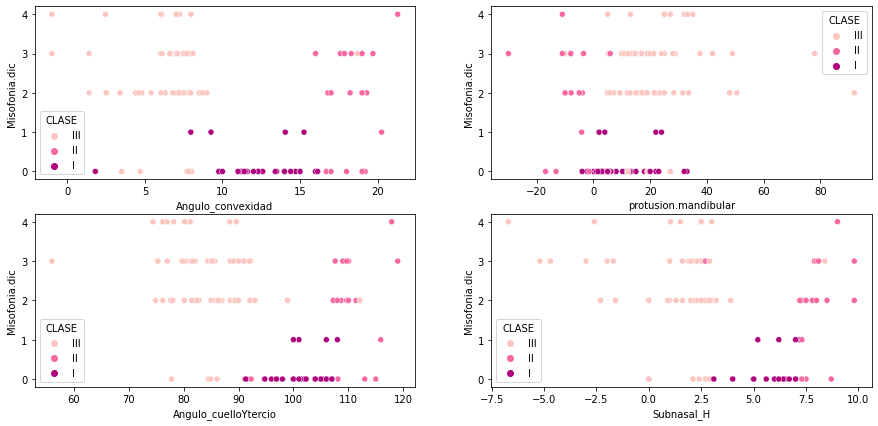

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
sns.scatterplot(data=df, x='Angulo_convexidad', y = 'Misofonia.dic', hue = 'CLASE', palette = 'RdPu',ax=axes[0,0])
sns.scatterplot(data=df, x='protusion.mandibular', y = 'Misofonia.dic', hue = 'CLASE', palette = 'RdPu',ax=axes[0,1])
sns.scatterplot(data=df, x='Angulo_cuelloYtercio', y = 'Misofonia.dic', hue = 'CLASE', palette = 'RdPu',ax=axes[1,0])
sns.scatterplot(data=df, x='Subnasal_H', y = 'Misofonia.dic', hue = 'CLASE', palette = 'RdPu',ax=axes[1,1])

╒═════════╤═════════════════════╤════════════════════════╤════════════════════════╤══════════════╕
│ CLASE   │   Angulo_convexidad │   protusion.mandibular │   Angulo_cuelloYtercio │   Subnasal_H │
╞═════════╪═════════════════════╪════════════════════════╪════════════════════════╪══════════════╡
│ I       │            12.2118  │                9.34118 │               101.835  │      5.38529 │
├─────────┼─────────────────────┼────────────────────────┼────────────────────────┼──────────────┤
│ II      │            18.302   │               -6.8975  │               109.805  │      7.54    │
├─────────┼─────────────────────┼────────────────────────┼────────────────────────┼──────────────┤
│ III     │             6.85841 │               21.1551  │                85.0638 │      1.51348 │
╘═════════╧═════════════════════╧════════════════════════╧════════════════════════╧══════════════╛
For Angulo Convexidad the F value = 64.49624786297782and, the p value = 1.0806499266251932e-16
For protusion.

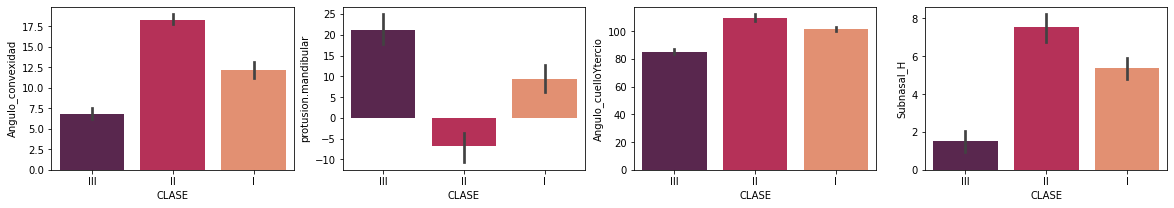

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 3))
from tabulate import tabulate
df_JAW = df.groupby(by = 'CLASE')[['Angulo_convexidad','protusion.mandibular','Angulo_cuelloYtercio','Subnasal_H']].mean()
print(tabulate(df_JAW, headers = 'keys', tablefmt = 'fancy_grid'))
sns.barplot(data=df, x="CLASE", y="Angulo_convexidad",ax=axes[0],palette='rocket')
sns.barplot(data=df, x="CLASE", y="protusion.mandibular",ax=axes[1],palette='rocket')
sns.barplot(data=df, x="CLASE", y="Angulo_cuelloYtercio",ax=axes[2],palette='rocket')
sns.barplot(data=df, x="CLASE", y="Subnasal_H",ax=axes[3],palette='rocket')
#Creating Table of Jaw parameter per clase
Jaw_per_CLASE = df.pivot(columns='CLASE')[['Angulo_convexidad','protusion.mandibular','Angulo_cuelloYtercio','Subnasal_H']]
Jaw_per_CLASE
#ANOVA test per jaw parameter
#Dropping NaN values form new_tab
for i in range(1,df.shape[1]):
    K2= Jaw_per_CLASE['Angulo_convexidad','I'].dropna(axis=0, how='any')
    L2= Jaw_per_CLASE['Angulo_convexidad','II'].dropna(axis=0, how='any')
    M2= Jaw_per_CLASE['Angulo_convexidad','II'].dropna(axis=0, how='any')
    K3= Jaw_per_CLASE['protusion.mandibular','I'].dropna(axis=0, how='any')
    L3= Jaw_per_CLASE['protusion.mandibular','II'].dropna(axis=0, how='any')
    M3= Jaw_per_CLASE['protusion.mandibular','II'].dropna(axis=0, how='any')
    K4= Jaw_per_CLASE['Angulo_cuelloYtercio','I'].dropna(axis=0, how='any')
    L4= Jaw_per_CLASE['Angulo_cuelloYtercio','II'].dropna(axis=0, how='any')
    M4= Jaw_per_CLASE['Angulo_cuelloYtercio','II'].dropna(axis=0, how='any')
    K5= Jaw_per_CLASE['Subnasal_H','I'].dropna(axis=0, how='any')
    L5= Jaw_per_CLASE['Subnasal_H','II'].dropna(axis=0, how='any')
    M5= Jaw_per_CLASE['Subnasal_H','II'].dropna(axis=0, how='any')
#Getting F value and p value
fvalue2, pvalue2 = stats.f_oneway(K2,L2,M2)
fvalue3, pvalue3 = stats.f_oneway(K3,L3,M3)
fvalue4, pvalue4 = stats.f_oneway(K4,L4,M4)
fvalue5, pvalue5 = stats.f_oneway(K5,L5,M5)
print(f'For Angulo Convexidad the F value = {fvalue2}and, the p value = {pvalue2}')
print(f'For protusion.mandibular the F value = {fvalue3}and, the p value = {pvalue3}')
print(f'For Angulo_cuelloYtercio the F value = {fvalue4}and, the p value = {pvalue4}')
print(f'For Subnasal_H the F value = {fvalue5}and, the p value = {pvalue5}')

### Conclusions:
    
- We can see an interesting grouping of Jaw parameters per CLASES, to what degree we cannot say. However it is interesting that it appears that theese classes present different (at least visually) a distinguinshingly different grouping of parameter scores. Also the groups seem to have different positions in relation to misophonia.
    
- To investigate is this grouping is significant we performed ANOVA test to see is the mean jaw parameters differed significantly for each class. We found that there was a significant difference in between all jaw parameters alocated per classes.

### Take away:

Due to this interesting allocation of Jaw parameters per jaw classes, we are interested to see if misophonia and anxiety (which was previously shown to be connected with misophonia) are correlated with the Jaw parameters in any signifcant way.

## Jaw parameter distribution for people with and without Misophonia:
Here we perform two mean T-tests between Jaw paramater values for misophonic and non misophonic people to see if their differ significantly.

The results for the Two-mean t-test:
Angulo_convexidad:       Ttest_indResult(statistic=-3.1162076027364916, pvalue=0.0022884325523715625)
protusion.mandibular:    Ttest_indResult(statistic=2.3621450637589776, pvalue=0.01976544794502747)
Angulo_cuelloYtercio:    Ttest_indResult(statistic=-4.27721621640809, pvalue=3.802675073885137e-05)
Subnasal_H:              Ttest_indResult(statistic=-3.435334441194023, pvalue=0.0008114716714150974)


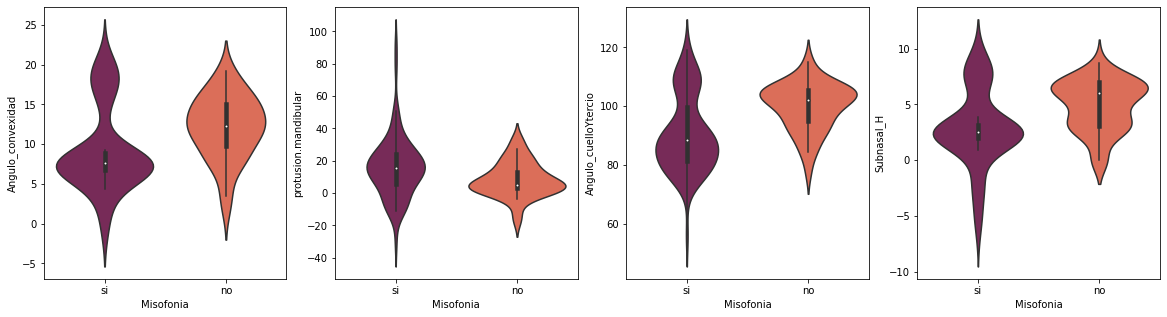

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
#Two Mean test for convexity angle per JAW Class
#Violoin plots
sns.violinplot(data=df,x='Misofonia', y='Angulo_convexidad',palette = "rocket",ax=axes[0])
sns.violinplot(data=df,x='Misofonia', y='protusion.mandibular',palette = "rocket",ax=axes[1])
sns.violinplot(data=df,x='Misofonia', y='Angulo_cuelloYtercio',palette = "rocket",ax=axes[2])
sns.violinplot(data=df,x='Misofonia', y='Subnasal_H',palette = "rocket",ax=axes[3])
#Misofonia Yes and NO table for jaw parameters
new_tab = df.pivot(columns='Misofonia')[['Angulo_convexidad','protusion.mandibular','Angulo_cuelloYtercio','Subnasal_H']]
#Dropping NaN values form new_tab Angulo Conv
for i in range(1,df.shape[1]):
    X= new_tab['Angulo_convexidad','si'].dropna(axis=0, how='any')
    Y= new_tab['Angulo_convexidad','no'].dropna(axis=0, how='any')
    #Dropping NaN values form new_tab Angulo Conv
for i in range(1,df.shape[1]):
    W= new_tab['protusion.mandibular','si'].dropna(axis=0, how='any')
    Z= new_tab['protusion.mandibular','no'].dropna(axis=0, how='any')
    #Dropping NaN values form new_tab Angulo Conv
for i in range(1,df.shape[1]):
    A= new_tab['Angulo_cuelloYtercio','si'].dropna(axis=0, how='any')
    B= new_tab['Angulo_cuelloYtercio','no'].dropna(axis=0, how='any')
#Dropping NaN values form new_tab Angulo Conv
for i in range(1,df.shape[1]):
    C= new_tab['Subnasal_H','si'].dropna(axis=0, how='any')
    D= new_tab['Subnasal_H','no'].dropna(axis=0, how='any')   
#Two mean t-test
print('The results for the Two-mean t-test:')
print(f'Angulo_convexidad:       {stats.ttest_ind(X, Y)}')
print(f'protusion.mandibular:    {stats.ttest_ind(W, Z)}')
print(f'Angulo_cuelloYtercio:    {stats.ttest_ind(A, B)}')
print(f'Subnasal_H:              {stats.ttest_ind(C, D)}')

As we can see the means differ significantly between people with and without misifonia for all Jaw Paramteres. The next thing to do is investigate if any of theese Jaw parameters correlate with Anxiety which we are using as an indicator for misofonia. 

### Conclusion:
The jaw parameter distrubutions and their means differ significantly between people with and without misifonia for all Jaw Parameters. 

## Correlation of Anxiety vs. Jaw parameters for people with and without Misophonia:
The next thing to do is investigate if any of these Jaw parameters correlate with Anxiety (which as we alsready now is connected to misophonia). 


 Convexity angle and ANX correlation, YES-Misofonia:
SpearmanrResult(correlation=-0.19923337192616192, pvalue=0.07273746454975871)

 Convexity Angle and ANX correlation, NO-Misofonia:
SpearmanrResult(correlation=0.14218919981204028, pvalue=0.37517753973120815)

 Mandibular protrusion and ANX correlation, YES-Misofonia:
SpearmanrResult(correlation=0.1901589630929434, pvalue=0.08704811227593118)

 Mandibular protrusion and ANX correlation, NO-Misofonia:
SpearmanrResult(correlation=0.08162569656658435, pvalue=0.6119134485651656)

 Angulo Cuello y tercio and ANX correlation, YES-Misofonia:
SpearmanrResult(correlation=-0.28058357846631754, pvalue=0.010670809733859317)

 Angulo Cuello y tercio and ANX correlation, NO-Misofonia:
SpearmanrResult(correlation=-0.09091407589223995, pvalue=0.5718668347197036)

 Subnasal_H and ANX correlation, YES-Misofonia:
SpearmanrResult(correlation=-0.27253430875176654, pvalue=0.01324550193681418)

 Subnasal_H and ANX correlation, NO-Misofonia:
SpearmanrResult

<AxesSubplot:xlabel="('Subnasal_H', 'no')", ylabel="('ansiedad.rasgo', 'no')">

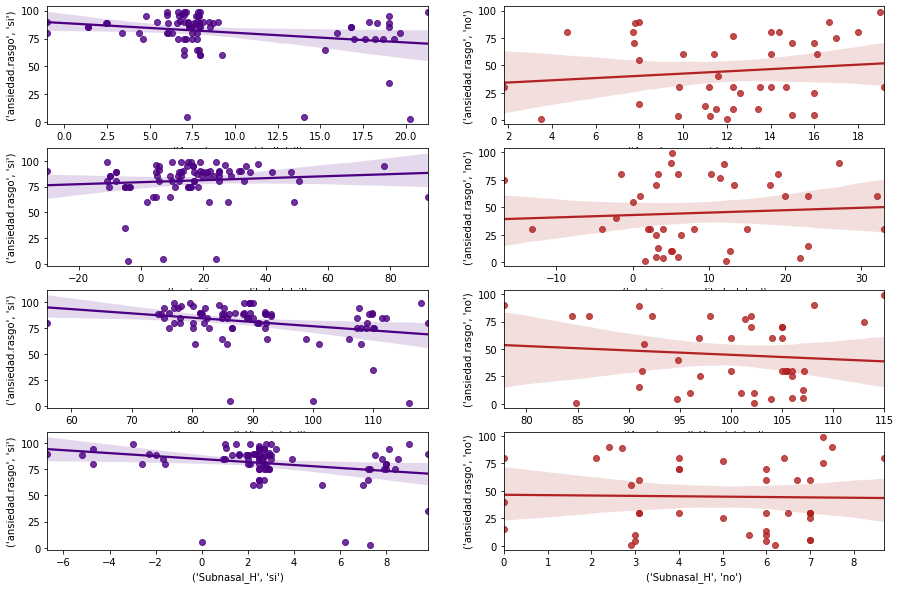

In [37]:
#Testing the correlation between Angle convexity and MA score for each JAW type
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
new_tab = df.pivot(columns='Misofonia')[['ansiedad.rasgo','Angulo_convexidad','protusion.mandibular','Angulo_cuelloYtercio','Subnasal_H']]
#Getting correlation values for three significantley different jaw types
#Angulo Convexidad and Anxiety/Misofonia
for i in range(1,df.shape[1]):
    X= new_tab['Angulo_convexidad','si'].dropna(axis=0, how='any')
    Y= new_tab['ansiedad.rasgo','si'].dropna(axis=0, how='any')
print('\n Convexity angle and ANX correlation, YES-Misofonia:')
print(stats.spearmanr(X, Y))
slope, intercept, r_value, pv, se = stats.linregress(X,Y)
sns.regplot(x=X, y=Y, data=new_tab,ax=axes[0,0],color='indigo') 
for i in range(1,df.shape[1]):
    W= new_tab['Angulo_convexidad','no'].dropna(axis=0, how='any')
    Z= new_tab['ansiedad.rasgo','no'].dropna(axis=0, how='any')
print('\n Convexity Angle and ANX correlation, NO-Misofonia:')
print(stats.spearmanr(W, Z))
slope, intercept, r_value, pv, se = stats.linregress(W,Z)
sns.regplot(x=W, y=Z, data=new_tab,ax=axes[0,1],color='firebrick')
#Protrusion mandibular and Anxiety/Misofonia
for i in range(1,df.shape[1]):
    A= new_tab['protusion.mandibular','si'].dropna(axis=0, how='any')
    B= new_tab['ansiedad.rasgo','si'].dropna(axis=0, how='any')
print('\n Mandibular protrusion and ANX correlation, YES-Misofonia:')   
print(stats.spearmanr(A, B))
slope, intercept, r_value, pv, se = stats.linregress(A,B)
sns.regplot(x=A, y=B, data=new_tab,ax=axes[1,0],color='indigo') 
for i in range(1,df.shape[1]):
    C= new_tab['protusion.mandibular','no'].dropna(axis=0, how='any')
    D= new_tab['ansiedad.rasgo','no'].dropna(axis=0, how='any')
print('\n Mandibular protrusion and ANX correlation, NO-Misofonia:')
print(stats.spearmanr(C, D))
slope, intercept, r_value, pv, se = stats.linregress(C,D)
sns.regplot(x=C, y=D, data=new_tab,ax=axes[1,1],color='firebrick')
#Angulo cuello y tercio and Anxiety/Misofonia
for i in range(1,df.shape[1]):
    K= new_tab['Angulo_cuelloYtercio','si'].dropna(axis=0, how='any')
    L= new_tab['ansiedad.rasgo','si'].dropna(axis=0, how='any')
print('\n Angulo Cuello y tercio and ANX correlation, YES-Misofonia:') 
print(stats.spearmanr(K, L))
slope, intercept, r_value, pv, se = stats.linregress(K,L)
sns.regplot(x=K, y=L, data=new_tab,ax=axes[2,0],color='indigo') 
for i in range(1,df.shape[1]):
    M= new_tab['Angulo_cuelloYtercio','no'].dropna(axis=0, how='any')
    N= new_tab['ansiedad.rasgo','no'].dropna(axis=0, how='any')
print('\n Angulo Cuello y tercio and ANX correlation, NO-Misofonia:')
print(stats.spearmanr(M, N))
slope, intercept, r_value, pv, se = stats.linregress(M,N)
sns.regplot(x=M, y=N, data=new_tab,ax=axes[2,1],color='firebrick')
#Subnasal H y tercio and Anxiety/Misofonia
for i in range(1,df.shape[1]):
    X= new_tab['Subnasal_H','si'].dropna(axis=0, how='any')
    Y= new_tab['ansiedad.rasgo','si'].dropna(axis=0, how='any')
print('\n Subnasal_H and ANX correlation, YES-Misofonia:')
print(stats.spearmanr(X, Y))
slope, intercept, r_value, pv, se = stats.linregress(X,Y)
sns.regplot(x=X, y=Y, data=new_tab,ax=axes[3,0],color='indigo') 
for i in range(1,df.shape[1]):
    W= new_tab['Subnasal_H','no'].dropna(axis=0, how='any')
    Z= new_tab['ansiedad.rasgo','no'].dropna(axis=0, how='any')
print('\n Subnasal_H and ANX correlation, NO-Misofonia:')
print(stats.spearmanr(W,Z))
slope, intercept, r_value, pv, se = stats.linregress(W,Z)
sns.regplot(x=W, y=Z, data=new_tab,ax=axes[3,1],color='firebrick')


### Conlusion:

- There are no significant correlations between anxiety and jaw paramenetrs for people without misophonia.

- For people who do have misophonia we can observe some clustering on the scatter plots. Though correlation coefficients are closer to zero than to 1 or -1, their absolute values are bigger than the ones for people who don't have misophonia. P-values indicate that probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the ones we have for misophonic people is only 1% for angulo cuello y tercio and subnasal_H and less than 10% for convexity angle and mandibular protrusion. 
  
### Take away:

The data that we have doesn't demonstrate too significant correlation between anxiety and the four jaw parameters, however it seems that there might exist some correlation for people who do have misophonia. It is interesting to note that if maybe we were to have a larger smaple size, the signficance of the test may be more significant. If we for example were to assume a 90% confidence interval, all of the anxiety X jaw parameter correlations would have yielded signifcant results for people with misophonia. It is espesially interesting considering that people without misophonia don't show any signs of possible correlation at all.  
    
 Whether or not Misofonia is provoked in people with specific jaw parameters and as such causes anxiety, or if anxiety just happens to be high in pateints with these paramters and anxiety causes misophonia, we cannot say. But we can say that it would be reasonable to do further research about it.

# Results

In this project we have been studing misophonia dataset: 
- We have uploaded it and cleared the data and described the demografics of the research as an introductionary part.
- We have been studying relationship between Misophonia, Anxiety and Depression and discovered that Anxiety mean score is higher for people with Misophonia while Depression mean score doesn't depend significantly on Misophonia presence.
- We noticed that Jaw parameters distribution depends on the class of the Jaw and Misophonia score seems to distribute differently for these classes as well.
- We confirmed that the mean scores of Jaw parameters differ significantly between people with and without Misophonia.
- We investigated the correlation between Jaw parameters and Anxiety. While there is no signs of it for people without Misophonia, there might be some correlation for those who have it and it requires further investigations.

In supplementary materials you can find our ideas on the further investigation of connection of the Jaw parameters with Misophonia and Anxiety.

